# Objective:
Classify whether a patient with mental illness needs treatment or not.

Steps involved
1. Library and data loading
2. Data Cleaning
3. Encoding Data
4. Covariance Matrix
5. EDA
6. Scalling and fitting
7. Evaluating classifiers
    a) Logistic Regression
    b) KNN
    c) SVM
    d) Random Forest
    e) Boosting
    f) Bagging
8. Tuning using Grid Search CV
9. Conclusion

## 1. Library and data loading

In [385]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [386]:
df = pd.read_csv("survey.csv")

In [387]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [388]:
#Types of data present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [389]:
#No. of rows and columns present
df.shape

(1259, 27)

In [390]:
#Distribution of the data
print(df.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


## 2. Data cleaning

In [391]:
#missing data
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [392]:
#Dropping the irrelevant columns
df.drop(columns = ["state", "Timestamp", "comments"], inplace = True)

In [393]:
#Checking if any missing data
df.isna().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [394]:
df.dtypes

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [395]:
df.columns[2:23]

Index(['Country', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical'],
      dtype='object')

In [396]:
# Assign default values for each data type
default_int = 0
default_string = 'NaN'

# Create lists by data tpe
int_column = df.columns[1]
string_column = df.columns[2:23]

# Replacing the NaN with the default values according to data type
for col in df:
    #print(feature)
    if col in int_column:
        df[col] = df[col].fillna(default_int)
    elif col in string_column:
        df[col] = df[col].fillna(default_string)
    else:
        print('Error: Feature %s not recognized.' % col)
df.head(5)   

Error: Feature Age not recognized.
Error: Feature obs_consequence not recognized.


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### Clean Gender

In [397]:
#lower case all columm's elements
gender = df['Gender'].str.lower()
#Getting the unique elements of Gender
print(gender.unique())

['female' 'm' 'male' 'male-ish' 'maile' 'trans-female' 'cis female' 'f'
 'something kinda male?' 'cis male' 'woman' 'mal' 'male (cis)'
 'queer/she/they' 'non-binary' 'femake' 'make' 'nah' 'all' 'enby' 'fluid'
 'genderqueer' 'female ' 'androgyne' 'agender' 'cis-female/femme'
 'guy (-ish) ^_^' 'male leaning androgynous' 'male ' 'man' 'trans woman'
 'msle' 'neuter' 'female (trans)' 'queer' 'female (cis)' 'mail'
 'a little about you' 'malr' 'p' 'femail' 'cis man'
 'ostensibly male, unsure what that really means']


In [398]:
#Divide into three gender groups - Male, Female and Queer
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
queer = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

#Iter through each row and column of the df
for (row, col) in df.iterrows():
    
    #Replacing Male types
    if str.lower(col.Gender) in male:
        df['Gender'].replace(to_replace = col.Gender, value ='male', inplace = True) 

    #Replacing Female types
    if str.lower(col.Gender) in female:
        df['Gender'].replace(to_replace = col.Gender, value = 'female', inplace = True)
        
    #Replacing Queer types
    if str.lower(col.Gender) in queer:
        df['Gender'].replace(to_replace = col.Gender, value = 'queer', inplace = True)

#Get rid of irrelevant data
unknown = ['A little about you', 'p']
df = df[~df['Gender'].isin(unknown)]

print(df['Gender'].unique())

['female' 'male' 'queer']


### Clean Age

In [399]:
df["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,          11,
                72], dtype=int64)

In [400]:
#Treating the outliers of Age
for index, rows in df.iterrows():
    #print("Current index ", index)
    #print("Current row ", rows)
    #print("Age is ", rows["Age"])
    if((df.loc[index, 'Age']) == -29):
        df.at[index, 'Age'] = 0
    if((df.loc[index, 'Age']) == 99999999999):
        df.at[index, 'Age'] = 0
    if((df.loc[index, 'Age']) == -1726):
        df.at[index, 'Age'] = 0
    if((df.loc[index, 'Age']) == 329):
        df.at[index, 'Age'] = 0        

In [401]:
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21,  0, 43, 56, 60, 54, 55,
       48, 20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61, 11, 72],
      dtype=int64)

In [402]:
#Replacing the Nan with median for the age column
df["Age"] = df["Age"].replace(0, df['Age'].median()) 

In [403]:
#Age ranges
df["Age_cat"] = pd.cut(df.Age, [0, 18 , 60, 800], labels=["Children", "Adult", "Senior Citizen"], include_lowest = True)

In [404]:
pd.qcut(df.Age, q = 4).head()

0    (36.0, 72.0]
1    (36.0, 72.0]
2    (31.0, 36.0]
3    (27.0, 31.0]
4    (27.0, 31.0]
Name: Age, dtype: category
Categories (4, interval[float64]): [(4.999, 27.0] < (27.0, 31.0] < (31.0, 36.0] < (36.0, 72.0]]

In [405]:
df.groupby("Age_cat").count()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age_cat,,,,,,,,,,,,,,,,,,,,,
Children,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Adult,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,...,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244
Senior Citizen,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


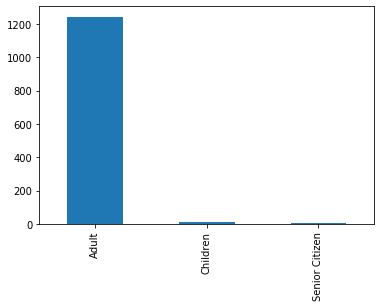

In [406]:
df['Age_cat'].value_counts().plot(kind='bar')

In [407]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Age_cat'],
      dtype='object')

### Cleaning Self employed

In [408]:
df['self_employed'].unique()

array(['NaN', 'Yes', 'No'], dtype=object)

In [409]:
#Replacing the 18 NaN values previously found, by No
df['self_employed'] = df['self_employed'].replace('NaN', 'No')

In [410]:
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

### Cleaning work interfere

In [411]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', 'NaN'], dtype=object)

In [412]:
#Replacing the NaN values previously found, by Unsure
df['work_interfere'] = df['work_interfere'].replace('NaN', 'Unsure')

In [413]:
df.groupby('work_interfere').count()

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_cat
work_interfere,,,,,,,,,,,,,,,,,,,,,
Never,213,213,213,213,213,213,213,213,213,213,...,213,213,213,213,213,213,213,213,213,213
Often,142,142,142,142,142,142,142,142,142,142,...,142,142,142,142,142,142,142,142,142,142
Rarely,173,173,173,173,173,173,173,173,173,173,...,173,173,173,173,173,173,173,173,173,173
Sometimes,465,465,465,465,465,465,465,465,465,465,...,465,465,465,465,465,465,465,465,465,465
Unsure,264,264,264,264,264,264,264,264,264,264,...,264,264,264,264,264,264,264,264,264,264


## 3. Encoding Data
For converting the labels into numeric form so as to convert it into the machine-readable form

In [414]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_cat
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Adult
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Adult
2,32,male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Adult
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Adult
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Adult


In [415]:
df["Gender_cat"] = df["Gender"].astype('category')
df["Gender_cat"] = df["Gender_cat"].cat.codes
df["Country"] = df["Country"].astype('category')
df["Country"] = df["Country"].cat.codes
df["self_employed"] = df["self_employed"].astype('category')
df["self_employed"] = df["self_employed"].cat.codes
df["family_history_cat"] = df["family_history"].astype('category')
df["family_history_cat"] = df["family_history_cat"].cat.codes
df["treatment_cat"] = df["treatment"].astype('category')
df["treatment_cat"] = df["treatment_cat"].cat.codes
df["work_interfere_cat"] = df["work_interfere"].astype('category')
df["work_interfere_cat"] = df["work_interfere_cat"].cat.codes
df["no_employees"] = df["no_employees"].astype('category')
df["no_employees"] = df["no_employees"].cat.codes
df["remote_work"] = df["remote_work"].astype('category')
df["remote_work"] = df["remote_work"].cat.codes
df["tech_company"] = df["tech_company"].astype('category')
df["tech_company"] = df["tech_company"].cat.codes
df["benefits_cat"] = df["benefits"].astype('category')
df["benefits_cat"] = df["benefits_cat"].cat.codes
df["care_options_cat"] = df["care_options"].astype('category')
df["care_options_cat"] = df["care_options_cat"].cat.codes
df["wellness_program"] = df["wellness_program"].astype('category')
df["wellness_program"] = df["wellness_program"].cat.codes
df["seek_help"] = df["seek_help"].astype('category')
df["seek_help"] = df["seek_help"].cat.codes
df["anonymity"] = df["anonymity"].astype('category')
df["anonymity"] = df["anonymity"].cat.codes
df["leave"] = df["leave"].astype('category')
df["leave"] = df["leave"].cat.codes
df["mental_health_consequence"] = df["mental_health_consequence"].astype('category')
df["mental_health_consequence"] = df["mental_health_consequence"].cat.codes
df["phys_health_consequence"] = df["phys_health_consequence"].astype('category')
df["phys_health_consequence"] = df["phys_health_consequence"].cat.codes
df["coworkers"] = df["coworkers"].astype('category')
df["coworkers"] = df["coworkers"].cat.codes
df["supervisor"] = df["supervisor"].astype('category')
df["supervisor"] = df["supervisor"].cat.codes
df["mental_health_interview"] = df["mental_health_interview"].astype('category')
df["mental_health_interview"] = df["mental_health_interview"].cat.codes
df["phys_health_interview"] = df["phys_health_interview"].astype('category')
df["phys_health_interview"] = df["phys_health_interview"].cat.codes
df["mental_vs_physical"] = df["mental_vs_physical"].astype('category')
df["mental_vs_physical"] = df["mental_vs_physical"].cat.codes
df["obs_consequence"] = df["obs_consequence"].astype('category')
df["obs_consequence"] = df["obs_consequence"].cat.codes
df["Age_cat_cat"] = df["Age_cat"].astype('category')
df["Age_cat_cat"] = df["Age_cat_cat"].cat.codes

In [416]:
df.dtypes

Age                             int64
Gender                         object
Country                          int8
self_employed                    int8
family_history                 object
treatment                      object
work_interfere                 object
no_employees                     int8
remote_work                      int8
tech_company                     int8
benefits                       object
care_options                   object
wellness_program                 int8
seek_help                        int8
anonymity                        int8
leave                            int8
mental_health_consequence        int8
phys_health_consequence          int8
coworkers                        int8
supervisor                       int8
mental_health_interview          int8
phys_health_interview            int8
mental_vs_physical               int8
obs_consequence                  int8
Age_cat                      category
Gender_cat                       int8
family_histo

In [417]:
#Checking for missing data
df.isna().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Age_cat                      0
Gender_cat                   0
family_history_cat           0
treatment_cat                0
work_interfere_cat           0
benefits_cat                 0
care_options_cat             0
Age_cat_cat                  0
dtype: i

In [418]:
df.describe()

,Age,Country,self_employed,no_employees,remote_work,tech_company,wellness_program,seek_help,anonymity,leave,...,phys_health_interview,mental_vs_physical,obs_consequence,Gender_cat,family_history_cat,treatment_cat,work_interfere_cat,benefits_cat,care_options_cat,Age_cat_cat
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,...,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,32.035004,36.834527,0.114558,2.787589,0.297534,0.818616,1.031026,0.908512,0.645187,1.406523,...,0.715990,0.813047,0.144789,0.818616,0.389817,0.505171,2.338107,1.053302,0.953063,0.996022
std,7.335156,13.237348,0.318615,1.738082,0.457355,0.385490,0.573978,0.691439,0.907222,1.506162,...,0.722483,0.833736,0.352028,0.422915,0.487903,0.500172,1.374038,0.836769,0.865212,0.101659
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,41.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,31.000000,44.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,36.000000,44.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000
max,72.000000,46.000000,1.000000,5.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,...,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,4.000000,2.000000,2.000000,2.000000


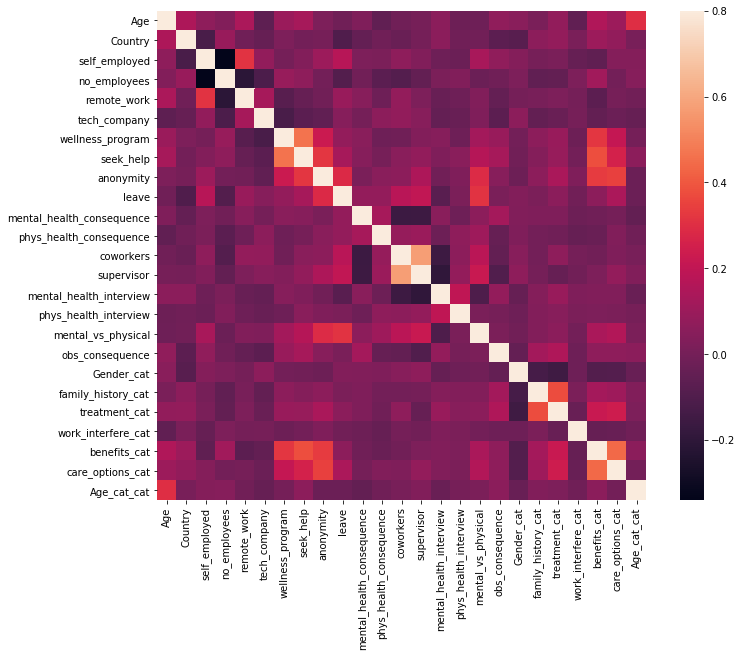

In [419]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True);
plt.show()

In [420]:
# Our target variable is treatment, that is the patient needs treatment or not
# Moderate correlation with family history and work interfere
corr_matrix

,Age,Country,self_employed,no_employees,remote_work,tech_company,wellness_program,seek_help,anonymity,leave,...,phys_health_interview,mental_vs_physical,obs_consequence,Gender_cat,family_history_cat,treatment_cat,work_interfere_cat,benefits_cat,care_options_cat,Age_cat_cat
Age,1.000000,0.149541,0.066758,0.035805,0.143324,-0.059417,0.099968,0.130769,0.023045,-0.014621,...,-0.021109,-0.018848,0.072345,0.054919,0.013314,0.077858,-0.053075,0.157301,0.104259,0.297013
Country,0.149541,1.000000,-0.117261,0.096334,-0.014481,-0.040524,0.024673,-0.005831,0.004720,-0.099812,...,-0.013326,-0.009082,-0.066102,-0.078608,0.065099,0.080096,0.012227,0.102219,0.076554,0.009569
self_employed,0.066758,-0.117261,1.000000,-0.339895,0.312281,0.078562,0.002317,0.036770,0.102170,0.173311,...,-0.028025,0.134638,0.072052,0.042066,0.004437,0.016264,-0.041260,-0.055771,0.042626,0.038661
no_employees,0.035805,0.096334,-0.339895,1.000000,-0.208888,-0.111023,0.091207,0.067292,-0.004915,-0.094118,...,0.030541,-0.027426,-0.014758,0.022281,-0.050623,-0.047733,0.022761,0.118373,-0.005576,0.044781
remote_work,0.143324,-0.014481,0.312281,-0.208888,1.000000,0.130228,-0.077654,-0.037221,-0.006332,0.095886,...,-0.018747,0.033242,-0.045254,-0.000668,0.011448,0.024593,-0.000572,-0.064357,0.007152,-0.008773
tech_company,-0.059417,-0.040524,0.078562,-0.111023,0.130228,1.000000,-0.118479,-0.068282,-0.052128,0.046195,...,-0.033602,0.028178,-0.064468,0.061751,-0.047080,-0.032295,0.006145,-0.046520,-0.027933,-0.038742
wellness_program,0.099968,0.024673,0.002317,0.091207,-0.077654,-0.118479,1.000000,0.464558,0.229099,0.082100,...,-0.015213,0.120274,0.095961,-0.003037,0.061970,0.092346,-0.022397,0.321466,0.208147,0.002117
seek_help,0.130769,-0.005831,0.036770,0.067292,-0.037221,-0.068282,0.464558,1.000000,0.321366,0.130541,...,0.056322,0.171948,0.129697,-0.007785,0.042077,0.087700,-0.005127,0.377231,0.258989,0.062780
anonymity,0.023045,0.004720,0.102170,-0.004915,-0.006332,-0.052128,0.229099,0.321366,1.000000,0.284525,...,0.027126,0.291172,0.048803,-0.020538,0.060902,0.140905,0.028611,0.335376,0.345950,-0.023948
leave,-0.014621,-0.099812,0.173311,-0.094118,0.095886,0.046195,0.082100,0.130541,0.284525,1.000000,...,0.018386,0.311647,0.012032,0.037107,0.019289,0.059034,-0.006837,0.063023,0.142346,-0.025830


## 5. EDA

Text(0.5, 1.0, 'Distribution of Age')

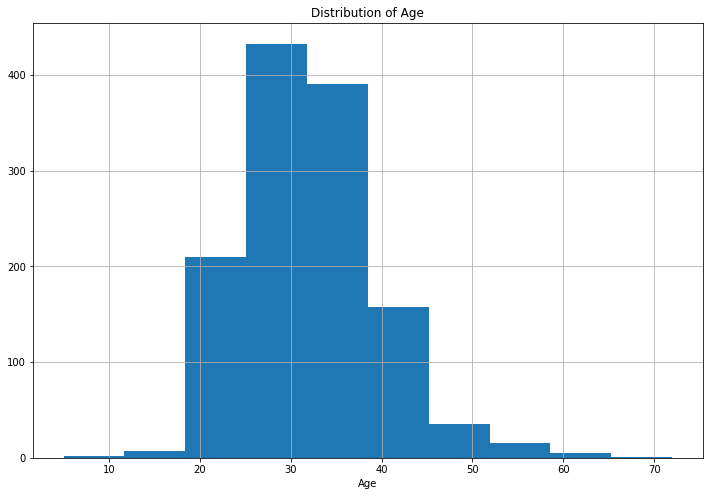

In [421]:
plt.figure(figsize=(12,8))
df["Age"].hist(bins = 10)
plt.xlabel("Age")
plt.title("Distribution of Age")

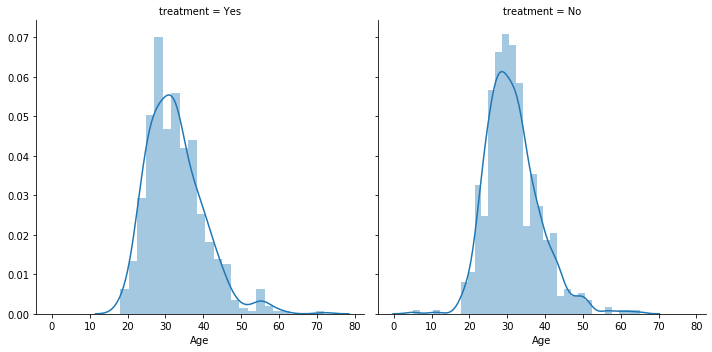

In [422]:
# Separate by treatment or not

g = sns.FacetGrid(df, col = 'treatment', height = 5)
g = g.map(sns.distplot, "Age")

In [425]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Age_cat', 'Gender_cat',
       'family_history_cat', 'treatment_cat', 'work_interfere_cat',
       'benefits_cat', 'care_options_cat', 'Age_cat_cat'],
      dtype='object')

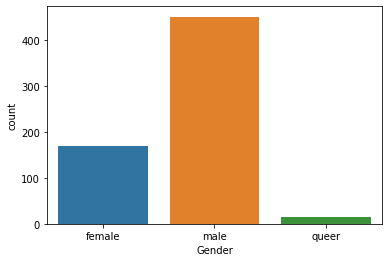

In [428]:
df_treatment = df[df["treatment_cat"] == 1]
# Let see how many people has been treated
sns.countplot(x ='Gender', data = df_treatment)
#0 : Female, 1: Male, 2: Queer

In [ ]:
df.columns

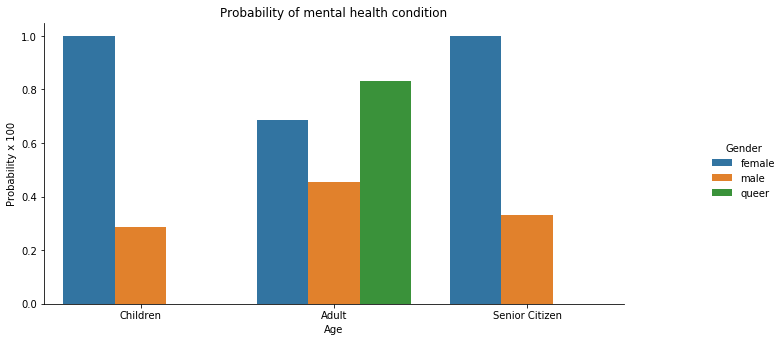

In [427]:
#Bar plot to show probabilities for Gender and Age group

g = sns.factorplot(x = "Age_cat", y = "treatment_cat", hue = "Gender", data = df, kind = "bar",  ci = None, height = 5, aspect = 2, legend_out = True)

#Labels
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Positioning the legend
g.fig.subplots_adjust(top = 0.9, right = 0.8)

plt.show()

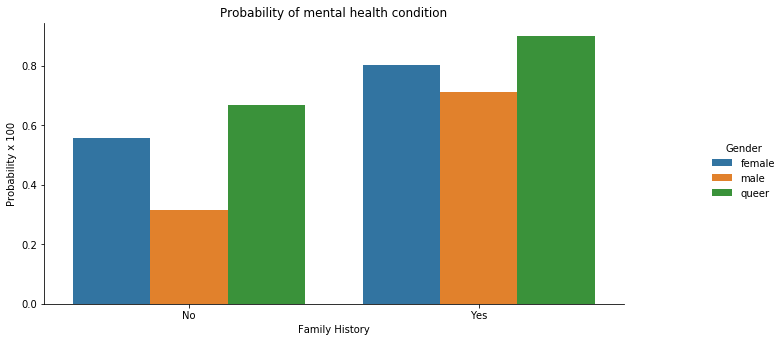

In [430]:
#Bar plot to show probabilities for Gender and Family history

g = sns.factorplot(x = "family_history", y = "treatment_cat", hue = "Gender", data = df, kind = "bar",  ci = None, height = 5, aspect = 2, legend_out = True)

#Labels
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# Positioning the legend
g.fig.subplots_adjust(top = 0.9, right = 0.8)

plt.show()

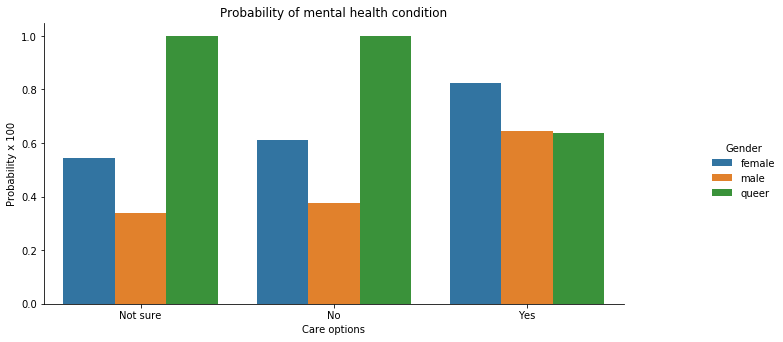

In [431]:
#Bar plot to show probabilities for Gender and Care options

g = sns.factorplot(x = "care_options", y = "treatment_cat", hue = "Gender", data = df, kind = "bar",  ci = None, height = 5, aspect = 2, legend_out = True)

#Labels
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# Positioning the legend
g.fig.subplots_adjust(top = 0.9, right = 0.8)


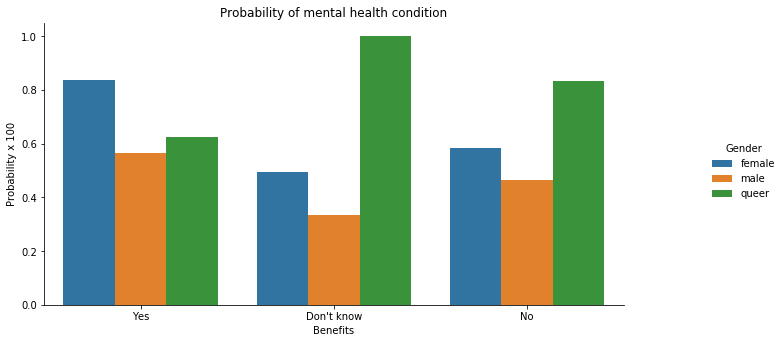

In [433]:
#Bar plot to show probabilities for Gender and Benefits

g = sns.factorplot(x = "benefits", y = "treatment_cat", hue = "Gender", data = df, kind = "bar",  ci = None, height = 5, aspect = 2, legend_out = True)

#Labels
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# Positioning the legend
g.fig.subplots_adjust(top = 0.9, right = 0.8)

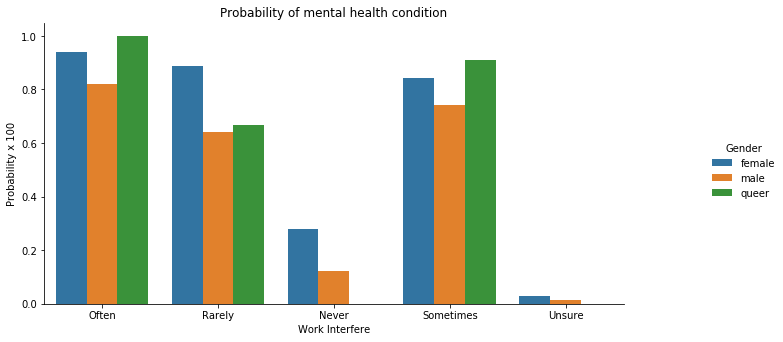

In [434]:
#Bar plot to show probabilities for Gender and Work Interfere

g = sns.factorplot(x = "work_interfere", y = "treatment_cat", hue = "Gender", data = df, kind = "bar",  ci = None, height = 5, aspect = 2, legend_out = True)

#Labels
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work Interfere')

# Positioning the legend
g.fig.subplots_adjust(top = 0.9, right = 0.8)

In [435]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_vs_physical,obs_consequence,Age_cat,Gender_cat,family_history_cat,treatment_cat,work_interfere_cat,benefits_cat,care_options_cat,Age_cat_cat
0,37,female,44,0,No,Yes,Often,4,0,1,...,2,0,Adult,0,0,1,1,2,1,1
1,44,male,44,0,No,No,Rarely,5,0,0,...,0,0,Adult,1,0,0,2,0,0,1
2,32,male,6,0,No,No,Rarely,4,0,1,...,1,0,Adult,1,0,0,2,1,0,1
3,31,male,43,0,Yes,Yes,Often,2,0,1,...,1,1,Adult,1,1,1,1,1,2,1
4,31,male,44,0,No,No,Never,1,1,1,...,0,0,Adult,1,0,0,0,2,0,1


## 6. Scaling and fitting

In [440]:
# Scaling Age
from sklearn.preprocessing import MinMaxScaler

In [441]:
scaler = MinMaxScaler()
#Except age, all other variables are almost similar. So scaling age.
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_vs_physical,obs_consequence,Age_cat,Gender_cat,family_history_cat,treatment_cat,work_interfere_cat,benefits_cat,care_options_cat,Age_cat_cat
0,0.477612,female,44,0,No,Yes,Often,4,0,1,...,2,0,Adult,0,0,1,1,2,1,1
1,0.582090,male,44,0,No,No,Rarely,5,0,0,...,0,0,Adult,1,0,0,2,0,0,1
2,0.402985,male,6,0,No,No,Rarely,4,0,1,...,1,0,Adult,1,0,0,2,1,0,1
3,0.388060,male,43,0,Yes,Yes,Often,2,0,1,...,1,1,Adult,1,1,1,1,1,2,1
4,0.388060,male,44,0,No,No,Never,1,1,1,...,0,0,Adult,1,0,0,0,2,0,1


In [442]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Age_cat', 'Gender_cat',
       'family_history_cat', 'treatment_cat', 'work_interfere_cat',
       'benefits_cat', 'care_options_cat', 'Age_cat_cat'],
      dtype='object')

In [444]:
# define X and y
feature_cols = ['Age_cat_cat', 'Gender_cat', 'family_history_cat', 'benefits_cat', 'care_options_cat', 'anonymity', 'leave', 'work_interfere_cat']
X = df[feature_cols]
y = df.treatment_cat

In [452]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [453]:
forest = ExtraTreesClassifier(n_estimators = 250, random_state = 0)
forest.fit(X, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

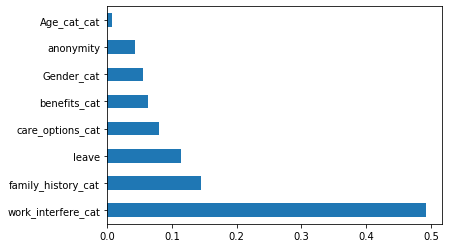

In [472]:
feat_importances = pd.Series(forest.feature_importances_, index = X.columns)

feat_importances.nlargest(8).plot(kind='barh')

## 7. Evaluating models

In [555]:
#Dictionary to store the accuracy scores of Algorithms
algo_score = {}

### a) Logistic Regression

In [557]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [558]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [559]:
y_pred = classifier.predict(X_test)

In [560]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[129  62]
 [ 51 136]]


In [561]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))
algo_score["Logistic Regression"] = accuracy_score(y_test, y_pred)

Accuracy :  0.701058201058201


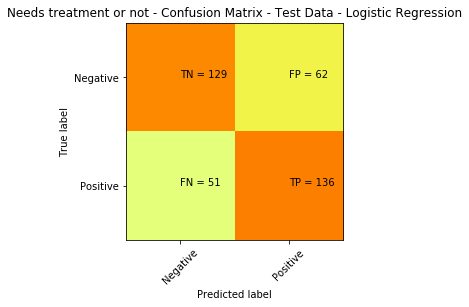

In [562]:
plt.clf()
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Needs treatment or not - Confusion Matrix - Test Data - Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

### b) KNN

In [564]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 27)
  
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [565]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [566]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))
algo_score["KNN Classifier"] = accuracy_score(y_test, y_pred)

Accuracy :  0.7380952380952381


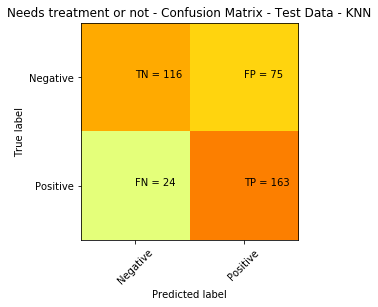

In [567]:
plt.clf()
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Needs treatment or not - Confusion Matrix - Test Data - KNN')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

### c) SVM

In [568]:
from sklearn.svm import SVC

In [569]:
svm = SVC()

In [570]:
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [571]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [572]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))
algo_score["Support Vector Machine"] = accuracy_score(y_test, y_pred)

Accuracy :  0.8068783068783069


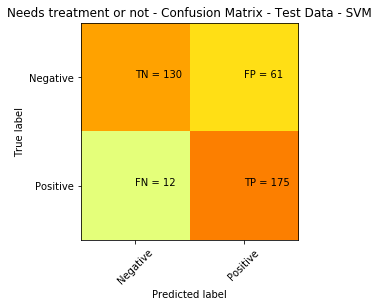

In [573]:
plt.clf()
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Needs treatment or not - Confusion Matrix - Test Data - SVM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

### d) Random Forest

In [574]:
from sklearn.ensemble import RandomForestClassifier

In [575]:
rfc = RandomForestClassifier(n_estimators = 20)

In [576]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [577]:
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [578]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))
algo_score["Random Forest"] = accuracy_score(y_test, y_pred)

Accuracy :  0.8042328042328042


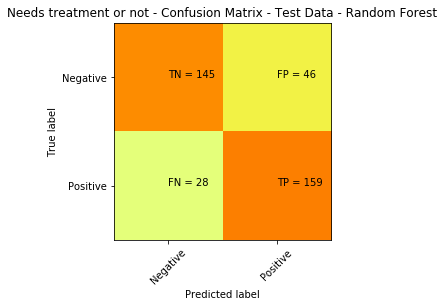

In [579]:
plt.clf()
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Needs treatment or not - Confusion Matrix - Test Data - Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

### e) Boosting

In [580]:
from sklearn.ensemble import AdaBoostClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
boost.fit(X_train, y_train)
    
# make class predictions for the testing set
y_pred = boost.predict(X_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred))    
algo_score["Boosting"] = accuracy_score(y_test, y_pred)

Accuracy :  0.8148148148148148


In [581]:
cm = confusion_matrix(y_test, y_pred)

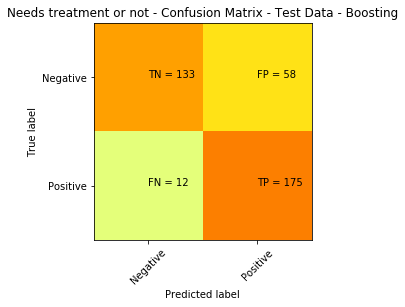

In [582]:
plt.clf()
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Needs treatment or not - Confusion Matrix - Test Data - Boosting')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

### f) Bagging

In [583]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
y_pred = bag.predict(X_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred))   
algo_score["Bagging"] = accuracy_score(y_test, y_pred)

Accuracy :  0.8121693121693122


In [584]:
cm = confusion_matrix(y_test, y_pred)

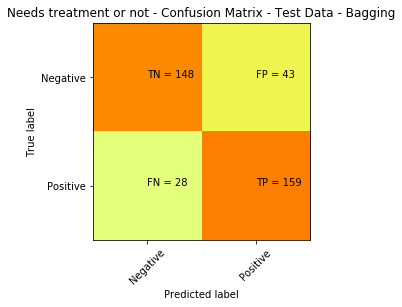

In [585]:
plt.clf()
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Needs treatment or not - Confusion Matrix - Test Data - Bagging')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

## 8. Tuning

In [608]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [612]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        },
    'knn':{
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [10, 20, 25, 30, 40]
        }
    }    
}
}

In [610]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_model = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model

,model,best_score,best_params
0,svm,0.828154,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.777247,{'n_estimators': 10}
2,logistic_regression,0.693682,{'C': 1}
3,naive_bayes_gaussian,0.756523,{}
4,naive_bayes_multinomial,0.683352,{}
5,decision_tree,0.760501,{'criterion': 'gini'}


## 9. Conclusion

In [587]:
algo_score

{'Logistic Regression': 0.701058201058201,
 'KNN Classifier': 0.7380952380952381,
 'Support Vector Machine': 0.8068783068783069,
 'Random Forest': 0.8042328042328042,
 'Boosting': 0.8148148148148148,
 'Bagging': 0.8121693121693122}

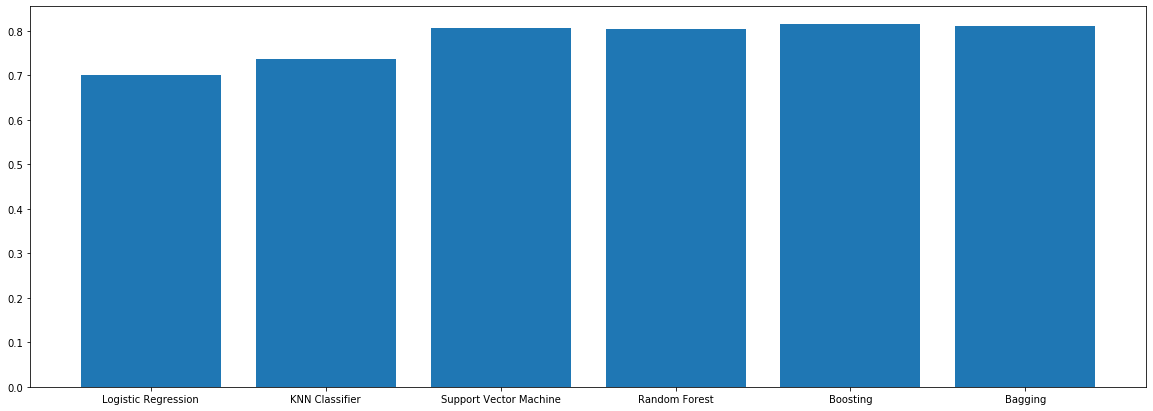

In [597]:
plt.figure(figsize=(20, 7))
plt.bar(range(len(algo_score)), list(algo_score.values()), align ='center')
plt.xticks(range(len(algo_score)), list(algo_score.keys()))

plt.show()

#### Boosting is the best algo to predict whether patient needs treatment or not